In [2]:
import error_lib as err
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

%load_ext autoreload
%autoreload 2

## Read data

In [3]:
sample_path = '/Users/oskar/MSci/new-physics/toy_data/flavio_tests/data/'
sample_filename = 'toy_data_c9_0.43_c10_0.17_2022_1_16_0.csv'
sample = pd.read_csv(sample_path + sample_filename, index_col=0)

sample_path = '/Users/oskar/MSci/new-physics/toy_data/wilson_regression/data/'
sample_filename_sm = 'low_q_with_weights.csv'
sample_sm = pd.read_csv(sample_path + sample_filename_sm)

In [4]:
simple_path = '/Users/oskar/MSci/new-physics/toy_data/flavio_tests/data/'
simple_filename = 'toy_data_c9_-0.46_c10_0.46_2021_10_29_13.csv'
simple_sample = pd.read_csv(simple_path + simple_filename, index_col=0)

## Load model

In [5]:
model_3d = tf.keras.models.load_model('data/models/model_3d_10bins_5000n')
model_3d_dense = tf.keras.models.load_model('data/models/model_3d_dense_10bins_5000n')
model_3d_dense_interp = tf.keras.models.load_model('data/models/model_3d_dense_10bins_interp')
model_3d_no_weight = tf.keras.models.load_model('data/models/model_3d_10bins_10000n_no_weighting')

# Error evaluation

In [10]:
predictions = err.compute_error_binned(
    model_3d_dense, 
    sample_sm[['q2', 'k', 'l']], 
    100, 
    10, 
    5000,
    weights=sample_sm['scenario_8_w']
)

c9_predictions, c10_predictions = predictions[:,0], predictions[:,1]

In [11]:
predictions_dense = err.compute_error_binned(
    model_3d_no_weight, 
    sample_sm[['q2', 'k', 'l']], 
    100, 
    10, 
    10000,
    # weights=sample_sm['scenario_8_w']
)

c9_predictions_dense, c10_predictions_dense = predictions_dense[:,0], predictions_dense[:,1]

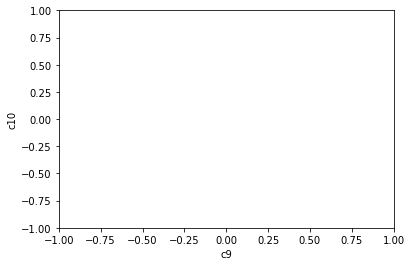

In [12]:
# err.plot_2d_error(c9_predictions, c10_predictions, bins=(50,50), c_range=(-1,1), show=True)
err.plot_2d_error(c9_predictions_dense, c10_predictions_dense, bins=(50,50), c_range=(-1,1), show=True, color_map=plt.cm.Greens)

In [13]:
c9_predictions_dense, c10_predictions_dense

(array([-1.6332017, -1.6041318, -1.6074363, -1.6443722, -1.613463 ,
        -1.6178025, -1.619826 , -1.6265025, -1.5960143, -1.608674 ,
        -1.6316231, -1.6083282, -1.629633 , -1.6044565, -1.6032168,
        -1.6343168, -1.6070411, -1.5782238, -1.600797 , -1.6208993,
        -1.592518 , -1.6267043, -1.5531015, -1.6100651, -1.6204509,
        -1.5973749, -1.6287389, -1.6040708, -1.6226873, -1.6224753,
        -1.6270767, -1.6334795, -1.5990194, -1.6197345, -1.6326065,
        -1.6020051, -1.6312164, -1.5921425, -1.610515 , -1.6461991,
        -1.6069015, -1.6037916, -1.609734 , -1.6249509, -1.6242254,
        -1.6298693, -1.6043645, -1.5960977, -1.6373847, -1.5870901,
        -1.6489662, -1.6441983, -1.5947555, -1.6216468, -1.6025091,
        -1.6126854, -1.6016942, -1.634432 , -1.609777 , -1.6347642,
        -1.6042268, -1.6007446, -1.6011438, -1.590921 , -1.6315987,
        -1.6250329, -1.597788 , -1.6386212, -1.6261778, -1.6166097,
        -1.599037 , -1.6266644, -1.6023349, -1.6

<ipython-input-50-6d93084dfe1f>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


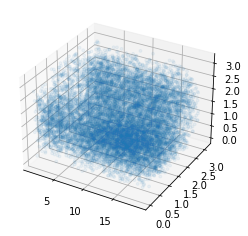

In [50]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# ax.scatter(x, y, x + y ** 2)
ax.scatter(*simple_sample[['q2','k','l']].values.T, s=8,alpha=0.06)

fig.show()